In [1]:
from functions import *
from features_dupe import *
import seaborn as sns
import matplotlib.pyplot as plt

# extract subnational population data from census website

In [2]:
id_pops = extract_census_data('indonesia-adm2')

In [3]:
id_pops

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM2 Population 2020
2,INDONESIA,IDN_01_01,ACEH,KABUPATEN SIMEULUE,93755
3,INDONESIA,IDN_01_02,ACEH,KABUPATEN ACEH SINGKIL,127556
4,INDONESIA,IDN_01_03,ACEH,KABUPATEN ACEH SELATAN,234666
5,INDONESIA,IDN_01_04,ACEH,KABUPATEN ACEH TENGGARA,222670
6,INDONESIA,IDN_01_05,ACEH,KABUPATEN ACEH TIMUR,426313
...,...,...,...,...,...
544,INDONESIA,IDN_34_29,SUMATERA UTARA,KOTA TEBING TINGGI,174385
545,INDONESIA,IDN_34_30,SUMATERA UTARA,KOTA MEDAN,2458274
546,INDONESIA,IDN_34_31,SUMATERA UTARA,KOTA BINJAI,294474
547,INDONESIA,IDN_34_32,SUMATERA UTARA,KOTA PADANG SIDEMPUAN,227176


# read papua new guinea ADM3 shapefile 

In [4]:
id_shapes = gpd.read_file('./id/Indonesia_adm2_uscb_2019.shp')[['GEO_MATCH', 'geometry']]

In [5]:
id_shapes

,GEO_MATCH,geometry
0,IDN_02_34,"POLYGON ((98.55792 2.89898, 98.55867 2.89760, ..."
1,IDN_01_07,"POLYGON ((96.27456 4.79694, 96.27542 4.79652, ..."
2,IDN_01_12,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7..."
3,IDN_01_04,"POLYGON ((97.82406 3.74896, 97.82177 3.74658, ..."
4,IDN_01_05,"POLYGON ((97.50049 5.24908, 97.50838 5.24523, ..."
...,...,...
493,IDN_14_03,"MULTIPOLYGON (((110.81980 -8.20358, 110.81950 ..."
494,IDN_14_01,"POLYGON ((110.25469 -7.64208, 110.25541 -7.642..."
495,IDN_14_04,"POLYGON ((110.44660 -7.54295, 110.44801 -7.544..."
496,IDN_14_05,"POLYGON ((110.35237 -7.76649, 110.35251 -7.766..."


# merge dataframes together

In [6]:
id_complete = id_pops.merge(id_shapes, left_on='GEO_MATCH', right_on='GEO_MATCH', how='inner')

In [7]:
id_complete

,Country,GEO_MATCH,ADM1 Name,ADM2 Name,ADM2 Population 2020,geometry
0,INDONESIA,IDN_01_01,ACEH,KABUPATEN SIMEULUE,93755,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,INDONESIA,IDN_01_02,ACEH,KABUPATEN ACEH SINGKIL,127556,"MULTIPOLYGON (((97.39711 2.03835, 97.39588 2.0..."
2,INDONESIA,IDN_01_03,ACEH,KABUPATEN ACEH SELATAN,234666,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
3,INDONESIA,IDN_01_04,ACEH,KABUPATEN ACEH TENGGARA,222670,"POLYGON ((97.82406 3.74896, 97.82177 3.74658, ..."
4,INDONESIA,IDN_01_05,ACEH,KABUPATEN ACEH TIMUR,426313,"POLYGON ((97.50049 5.24908, 97.50838 5.24523, ..."
...,...,...,...,...,...,...
317,INDONESIA,IDN_33_13,SUMATERA SELATAN,KABUPATEN MUSI RAWAS UTARA,190811,"POLYGON ((139.96223 -3.60980, 139.96313 -3.609..."
318,INDONESIA,IDN_33_14,SUMATERA SELATAN,KOTA PALEMBANG,1685034,"POLYGON ((140.14751 -3.69551, 140.14955 -3.695..."
319,INDONESIA,IDN_33_15,SUMATERA SELATAN,KOTA PRABUMULIH,194919,"POLYGON ((138.33917 -3.21598, 138.34389 -3.227..."
320,INDONESIA,IDN_33_16,SUMATERA SELATAN,KOTA PAGAR ALAM,145258,"MULTIPOLYGON (((139.57272 -2.23712, 139.57217 ..."


# apply validation code

In [16]:
id_complete = gpd.GeoDataFrame(id_complete)
indo = validate_id(id_complete, verbose=True)

Processing input data
Finding overlapping polygons
The Edopi people group did not intersect with an ADM2 boundary. They may be valid.
The Paku people group did not intersect with an ADM2 boundary. They may be valid.
The Bauri people group did not intersect with an ADM2 boundary. They may be valid.
The Demisa people group did not intersect with an ADM2 boundary. They may be valid.
The Woria people group did not intersect with an ADM2 boundary. They may be valid.
The Kirira people group did not intersect with an ADM2 boundary. They may be valid.
The Warembori people group did not intersect with an ADM2 boundary. They may be valid.
The Nobuk people group did not intersect with an ADM2 boundary. They may be valid.
The Baropasi people group did not intersect with an ADM2 boundary. They may be valid.
The Bonefa people group did not intersect with an ADM2 boundary. They may be valid.
The Aikwakai people group did not intersect with an ADM2 boundary. They may be valid.
The Bagusa people group 

In [17]:
indo

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM2 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
43,Han Chinese,IDN,11250000,Indonesia,"MULTIPOLYGON (((98.00642 4.09001, 98.01722 4.1...","[KABUPATEN ACEH SINGKIL, KABUPATEN ACEH TENGGA...",73387753.0,True,15.329533
144,Dem,IDN,1500,Indonesia,"MULTIPOLYGON (((137.87914 -3.63009, 137.87970 ...",[KABUPATEN OGAN KOMERING ULU SELATAN],412014.0,True,0.364065
146,Tondano,IDN,158000,Indonesia,"MULTIPOLYGON (((125.07924 1.36764, 125.07612 1...","[KABUPATEN JAYAWIJAYA, KABUPATEN BIAK NUMFOR, ...",835815.0,True,18.903705
147,Edopi,IDN,1700,Indonesia,"MULTIPOLYGON (((137.51900 -3.05749, 137.51946 ...",NONE,NaN,False,NaN
159,Selungai Murut,IDN,800,Indonesia,"MULTIPOLYGON (((116.52137 4.26487, 116.52178 4...",[KABUPATEN LEMBATA],137236.0,True,0.582937
...,...,...,...,...,...,...,...,...,...
11073,Bonai,IDN,14000,Indonesia,"MULTIPOLYGON (((100.94536 1.39489, 100.94539 1...","[KABUPATEN SELUMA, KABUPATEN LEBONG, KABUPATEN...",585988.0,True,2.389127
11074,Pakpak Boang,IDN,18000,Indonesia,"MULTIPOLYGON (((97.84868 2.38421, 97.85236 2.3...","[KABUPATEN ACEH SINGKIL, KOTA SUBULUSSALAM]",218896.0,True,8.223083
11440,Pago,IDN,3700,Indonesia,"MULTIPOLYGON (((127.73802 1.06965, 127.73788 1...",[KABUPATEN MINAHASA SELATAN],238507.0,True,1.551317
11476,Budong-Budong,IDN,600,Indonesia,"MULTIPOLYGON (((119.34383 -2.05462, 119.35391 ...",[KABUPATEN POSO],247148.0,True,0.242770


# results

### ID people groups with greatest population difference (>100% of total boundary population) 

In [18]:
indo_sorted = indo.sort_values(by='Percent Boundary Population', ascending=False)
indo_sorted.head()

,People Group,Alpha-3 Code,People Group Population,Country,geometry,ADM2 Boundaries Present,Total Boundary Population,Valid People Group,Percent Boundary Population
5008,Pesisir Lor,IDN,37580000,Indonesia,"MULTIPOLYGON (((111.05059 -6.47122, 111.05865 ...","[KABUPATEN KAPUAS HULU, KABUPATEN SEKADAU, KAB...",1617842.0,False,2322.847349
5078,Sasak,IDN,3600000,Indonesia,"MULTIPOLYGON (((116.37294 -8.21067, 116.37880 ...","[KABUPATEN KARIMUN, KABUPATEN BINTAN, KABUPATE...",499088.0,False,721.315680
5012,Sunda,IDN,45990000,Indonesia,"MULTIPOLYGON (((108.49017 -7.73226, 108.49179 ...","[KABUPATEN SAMBAS, KABUPATEN BENGKAYANG, KABUP...",6517535.0,False,705.634876
5022,Negarigung,IDN,22550000,Indonesia,"MULTIPOLYGON (((111.10060 -6.99158, 111.29810 ...","[KABUPATEN BARITO KUALA, KABUPATEN HULU SUNGAI...",4357130.0,False,517.542511
5074,Madura,IDN,8055000,Indonesia,"MULTIPOLYGON (((114.04628 -7.60882, 114.04992 ...","[KABUPATEN MAHAKAM ULU, KOTA BALIKPAPAN, KOTA ...",1743255.0,False,462.066651


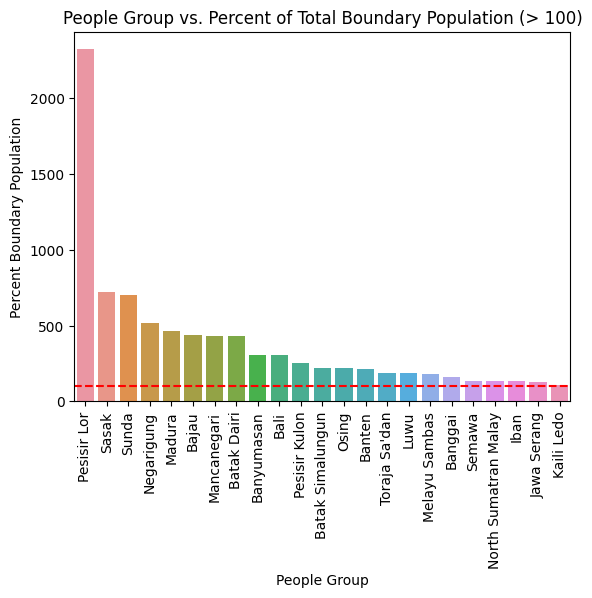

In [19]:
indo_above_100 = indo_sorted[indo_sorted['Percent Boundary Population'] > 100]
sns.barplot(data=indo_above_100, x='People Group', y='Percent Boundary Population')
plt.xticks(rotation=90);
plt.title('People Group vs. Percent of Total Boundary Population (> 100)')
plt.axhline(y=105, color='r', linestyle='--'); # 5% error

In [24]:
# number of people groups in Indonesia that failed the ADM2 test
invalid_indo = indo[indo['Valid People Group'] == False]
invalid_indo.shape[0]

66

In [25]:
invalid_indo.explore(color='red')